In [16]:
library(data.table)
library(ggplot2)

In [17]:
dataset <- fread("titanic.csv")
head(dataset)

survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<lgl>
0,3,male,22,1,0,7.2500,S,Third,man,TRUE,,Southampton,no,FALSE
1,1,female,38,1,0,71.2833,C,First,woman,FALSE,C,Cherbourg,yes,FALSE
1,3,female,26,0,0,7.9250,S,Third,woman,FALSE,,Southampton,yes,TRUE
1,1,female,35,1,0,53.1000,S,First,woman,FALSE,C,Southampton,yes,FALSE
0,3,male,35,0,0,8.0500,S,Third,man,TRUE,,Southampton,no,TRUE
0,3,male,NA,0,0,8.4583,Q,Third,man,TRUE,,Queenstown,no,TRUE


In [18]:
dataset$deck[dataset$deck == ""] <- NA

In [19]:
print(colSums(is.na(dataset)))

   survived      pclass         sex         age       sibsp       parch 
          0           0           0         177           0           0 
       fare    embarked       class         who  adult_male        deck 
          0           0           0           0           0         688 
embark_town       alive       alone 
          0           0           0 


In [20]:
summary(dataset)

    survived          pclass          sex                 age       
 Min.   :0.0000   Min.   :1.000   Length:891         Min.   : 0.42  
 1st Qu.:0.0000   1st Qu.:2.000   Class :character   1st Qu.:20.12  
 Median :0.0000   Median :3.000   Mode  :character   Median :28.00  
 Mean   :0.3838   Mean   :2.309                      Mean   :29.70  
 3rd Qu.:1.0000   3rd Qu.:3.000                      3rd Qu.:38.00  
 Max.   :1.0000   Max.   :3.000                      Max.   :80.00  
                                                     NA's   :177    
     sibsp           parch             fare          embarked        
 Min.   :0.000   Min.   :0.0000   Min.   :  0.00   Length:891        
 1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:  7.91   Class :character  
 Median :0.000   Median :0.0000   Median : 14.45   Mode  :character  
 Mean   :0.523   Mean   :0.3816   Mean   : 32.20                     
 3rd Qu.:1.000   3rd Qu.:0.0000   3rd Qu.: 31.00                     
 Max.   :8.000   Max.   :6.0

In [121]:
dataset$pclass <- as.factor(dataset$pclass)
dataset$survived <- as.factor(dataset$survived)
dataset$sex <- as.factor(dataset$sex)
dataset$who <- as.factor(dataset$who)
dataset$embarked <- as.factor(dataset$embarked)
dataset$sibsp <- as.factor(dataset$sibsp)
dataset$parch <- as.factor(dataset$parch)
dataset$adult_male <- as.factor(dataset$adult_male)
dataset$embark_town <- as.factor(dataset$embark_town)
dataset$alive <- as.factor(dataset$alive)
dataset$alone <- as.factor(dataset$alone)
dataset$class <- as.factor(dataset$class)
dataset$deck <- as.factor(dataset$deck)

In [122]:
str(dataset)

Classes ‘data.table’ and 'data.frame':	891 obs. of  15 variables:
 $ survived   : Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ pclass     : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ age        : num  22 38 26 35 35 23 54 2 27 14 ...
 $ sibsp      : Factor w/ 7 levels "0","1","2","3",..: 2 2 1 2 1 1 1 4 1 2 ...
 $ parch      : Factor w/ 7 levels "0","1","2","3",..: 1 1 1 1 1 1 1 2 3 1 ...
 $ fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...
 $ class      : Factor w/ 3 levels "First","Second",..: 3 1 3 1 3 3 1 3 3 2 ...
 $ who        : Factor w/ 3 levels "child","man",..: 2 3 3 3 2 2 2 1 3 1 ...
 $ adult_male : Factor w/ 2 levels "FALSE","TRUE": 2 1 1 1 2 2 2 1 1 1 ...
 $ deck       : Factor w/ 7 levels "A","B","C","D",..: NA 3 NA 3 NA NA 5 NA NA NA ...
 $ embark_town: Factor w/ 4 levels "","Cherbourg",..: 4 2 4 4 

Warning message:
“Removed 177 rows containing non-finite values (stat_boxplot).”


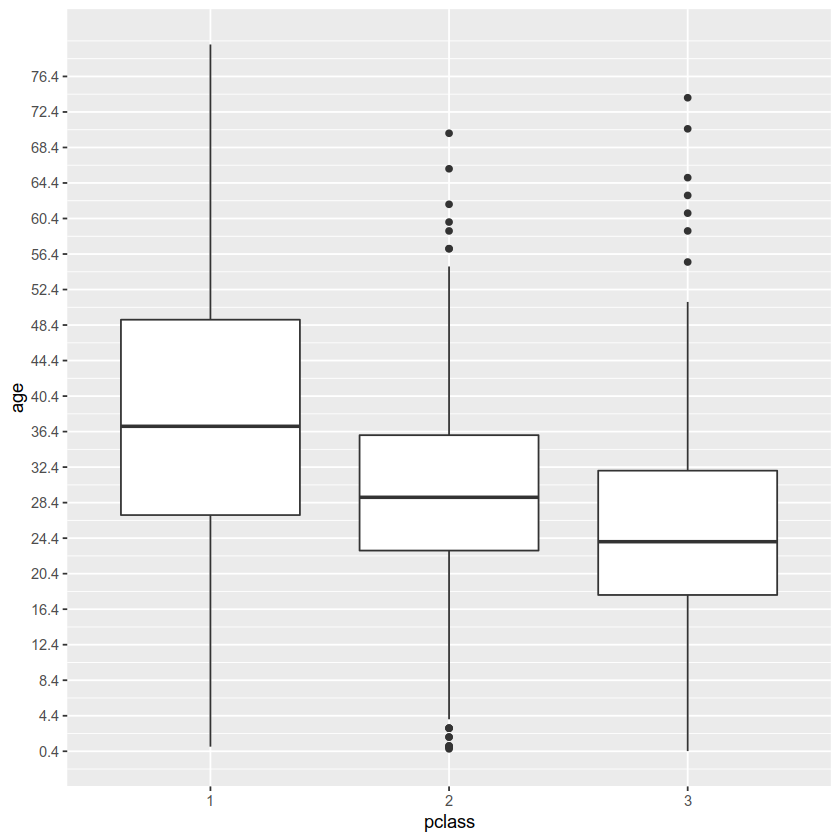

In [37]:
box_plot <- ggplot(dataset, aes(x = pclass, y = age), na.exclude = TRUE) + 
geom_boxplot() + 
scale_y_continuous(breaks = round(seq(min(dataset$age, na.rm = TRUE), 
                                      max(dataset$age, na.rm = TRUE), 
                                      by = 4), 
                                  1))

box_plot

In [47]:
# Class 1: Age 37
# Class 2: Age 26
# Class 3: Age 23

In [44]:
for(i in 1:length(dataset$age)){
    if(is.na(dataset$age[i])){
        if(dataset$pclass[i] == 1){
            dataset$age[i] <- 37
        }
        else if(dataset$pclass[i] == 2){
            dataset$age[i] <- 26
        }
        else{
            dataset$age[i] <- 23
        }
    }
}

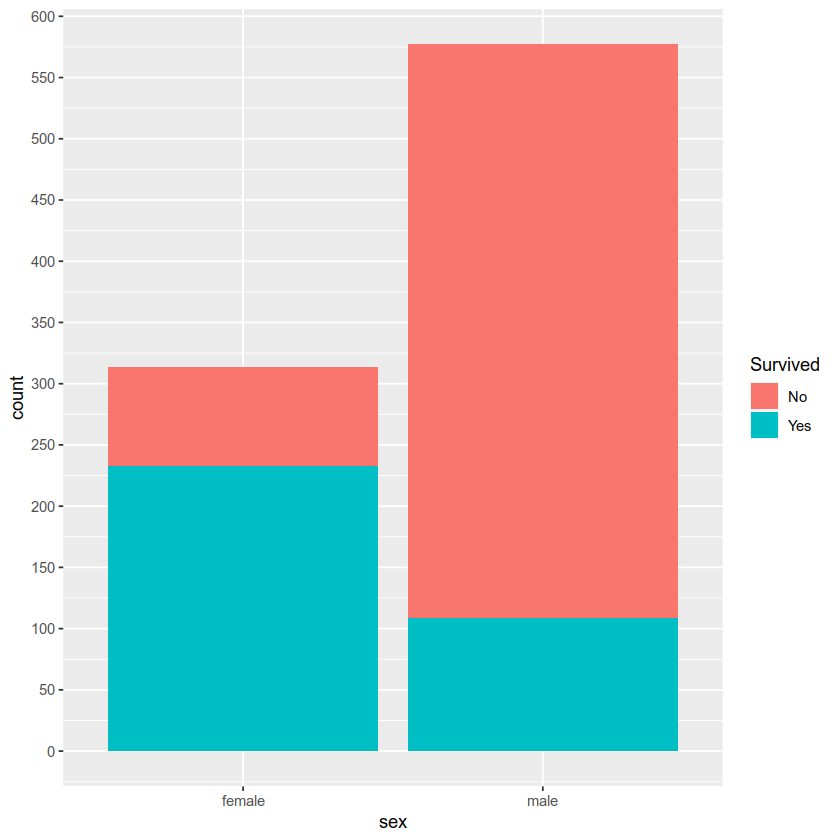

In [79]:
ggplot(data = dataset, aes(x = sex, fill = survived)) + 
geom_bar() + 
scale_fill_discrete(name = "Survived", labels = c("No", "Yes")) +
scale_y_continuous(breaks = round(seq(0, 600, by = 50), 1))

In [123]:
females_count = 0
males_count = 0
females_survived = 0
males_survived = 0

for(i in 1:length(dataset$sex)){
    if(dataset$sex[i] == 'male'){
        males_count = males_count + 1
        if(dataset$survived[i] == 1){
            males_survived = males_survived + 1
        }
    }
    else{
        females_count = females_count + 1
        if(dataset$survived[i] == 1){
            females_survived = females_survived + 1
        }
    }
}

print(paste("Total number of males: ", males_count))
print(paste("Total number of females: ", females_count))
print(paste("Number of males who survived: ", males_survived))
print(paste("Number of females who survived: ", females_survived))
print(paste("Percentage of males who survived: ", round(males_survived / males_count, 2)))
print(paste("Precentage of females who survived: ", round(females_survived / females_count, 2)))

[1] "Total number of males:  577"
[1] "Total number of females:  314"
[1] "Number of males who survived:  109"
[1] "Number of females who survived:  233"
[1] "Percentage of males who survived:  0.19"
[1] "Precentage of females who survived:  0.74"


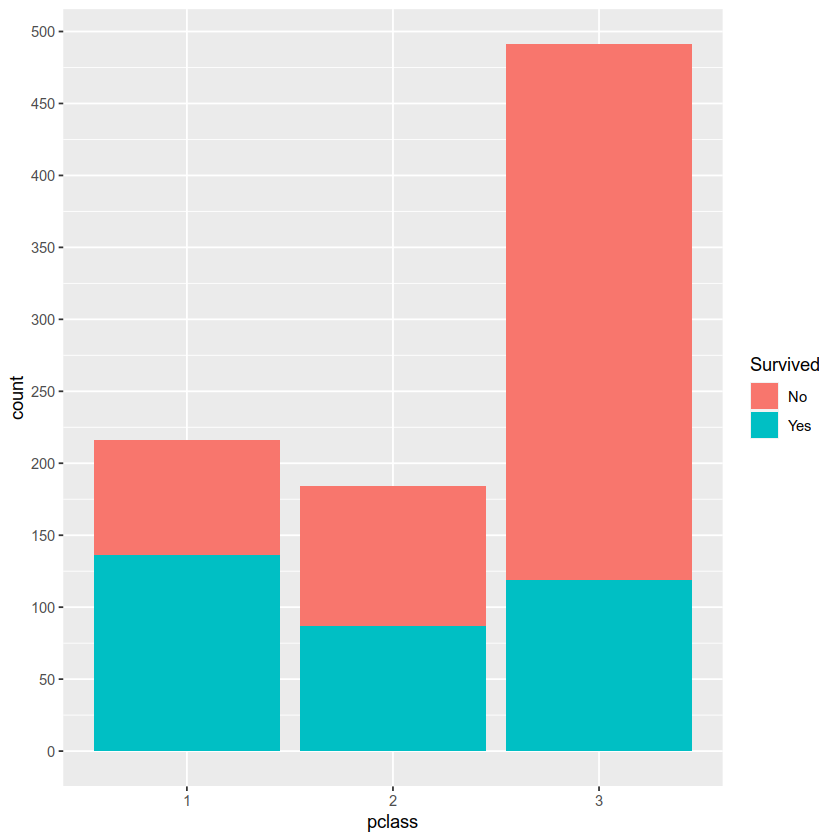

In [101]:
ggplot(data = dataset, aes(x = pclass, fill = survived)) +
geom_bar() + 
scale_fill_discrete(name = "Survived", labels = c("No", "Yes")) +
scale_y_continuous(breaks = round(seq(0, 500, by = 50), 1))

In [109]:
class1_number = 0
class2_number = 0
class3_number = 0
class1_survived = 0
class2_survived = 0
class3_survived = 0

for(i in 1:length(dataset$pclass)){
    if(dataset$pclass[i] == 1){
        class1_number = class1_number + 1
        if(dataset$survived[i] == 1){
            class1_survived = class1_survived + 1
        }
    }
    else if(dataset$pclass[i] == 2){
        class2_number = class2_number + 1
        if(dataset$survived[i] == 1){
            class2_survived = class2_survived + 1
        }
    }
    else{
        class3_number = class3_number + 1
        if(dataset$survived[i] == 1){
            class3_survived = class3_survived + 1
        }
    }
}

print(paste("Total number of people in class 1: ", class1_number))
print(paste("Total number of people in class 2: ", class2_number))
print(paste("Total number of people in class 3: ", class3_number))
print(paste("Number of people in class 1 who survived: ", class1_survived))
print(paste("Number of people in class 2 who survived: ", class2_survived))
print(paste("Number of people in class 3 who survived: ", class3_survived))
print(paste("Percentage of people in class 1 who survived: ", round(class1_survived / class1_number, 2)))
print(paste("Percentage of people in class 2 who survived: ", round(class2_survived / class2_number, 2)))
print(paste("Percentage of people in class 3 who survived: ", round(class3_survived / class3_number, 2)))

[1] "Total number of people in class 1:  216"
[1] "Total number of people in class 2:  184"
[1] "Total number of people in class 3:  491"
[1] "Number of people in class 1 who survived:  136"
[1] "Number of people in class 2 who survived:  87"
[1] "Number of people in class 3 who survived:  119"
[1] "Percentage of people in class 1 who survived:  0.63"
[1] "Percentage of people in class 2 who survived:  0.47"
[1] "Percentage of people in class 3 who survived:  0.24"


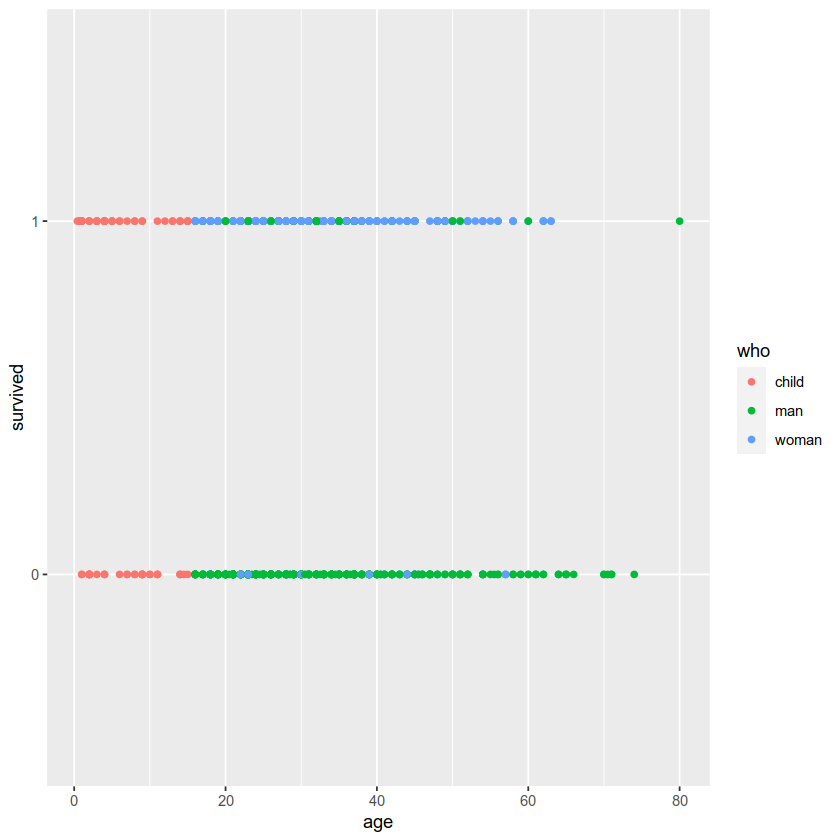

In [143]:
ggplot(data = dataset, aes(x = age, y = survived,color = who)) +
geom_point()

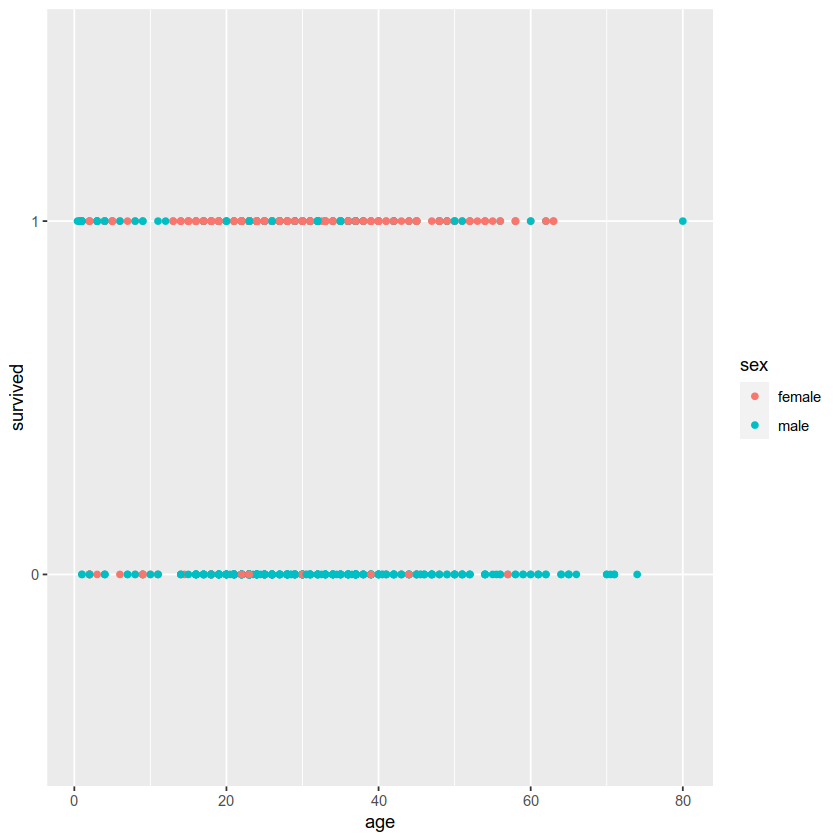

In [144]:
ggplot(data = dataset, aes(x = age, y = survived,color = sex)) +
geom_point()

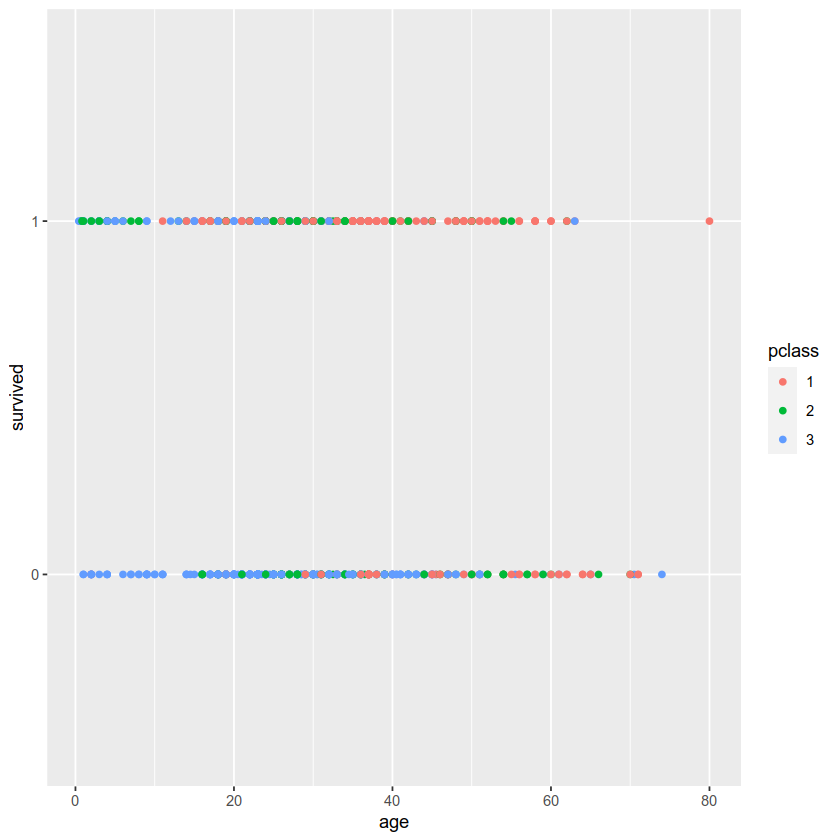

In [116]:
ggplot(data = dataset, aes(x = age, y = survived, color = pclass)) +
geom_point()

In [125]:
men_count = 0
women_count = 0
children_count = 0
men_survived = 0
women_survived = 0
children_survived = 0

for(i in 1:length(dataset$who)){
    if(dataset$who[i] == "child"){
        children_count = children_count + 1
        if(dataset$survived[i] == 1){
            children_survived = children_survived + 1
        }
    }
    else if(dataset$who[i] == "man"){
        men_count = men_count + 1
        if(dataset$survived[i] == 1){
            men_survived = men_survived + 1
        }
    }
    else{
        women_count = women_count + 1
        if(dataset$survived[i] == 1){
            women_survived = women_survived + 1
        }
    }
}

print(paste("Total number of children: ", children_count))
print(paste("Total number of men: ", men_count))
print(paste("Total number of women: ", women_count))
print(paste("Number children who survived: ", children_survived))
print(paste("Number of men who  survived: ", men_survived))
print(paste("Number of women who  survived: ", women_survived))
print(paste("Percentage of children who survived: ", round(children_survived / children_count, 2)))
print(paste("Percentage of men who  survived: ", round(men_survived / men_count, 2)))
print(paste("Percentage of women who survived: ", round(women_survived / women_count, 2)))

[1] "Total number of children:  83"
[1] "Total number of men:  537"
[1] "Total number of women:  271"
[1] "Number children who survived:  49"
[1] "Number of men who  survived:  88"
[1] "Number of women who  survived:  205"
[1] "Percentage of children who survived:  0.59"
[1] "Percentage of men who  survived:  0.16"
[1] "Percentage of women who survived:  0.76"


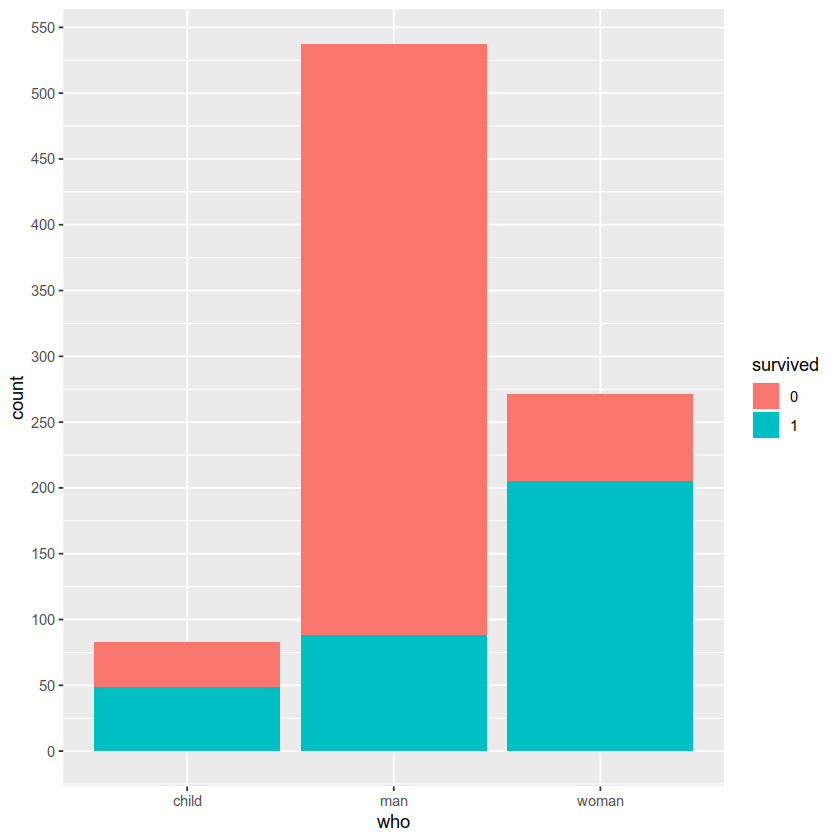

In [128]:
ggplot(data = dataset, aes(x = who, fill = survived)) +
geom_bar() + 
scale_y_continuous(breaks = round(seq(0, 550, by = 50), 1))

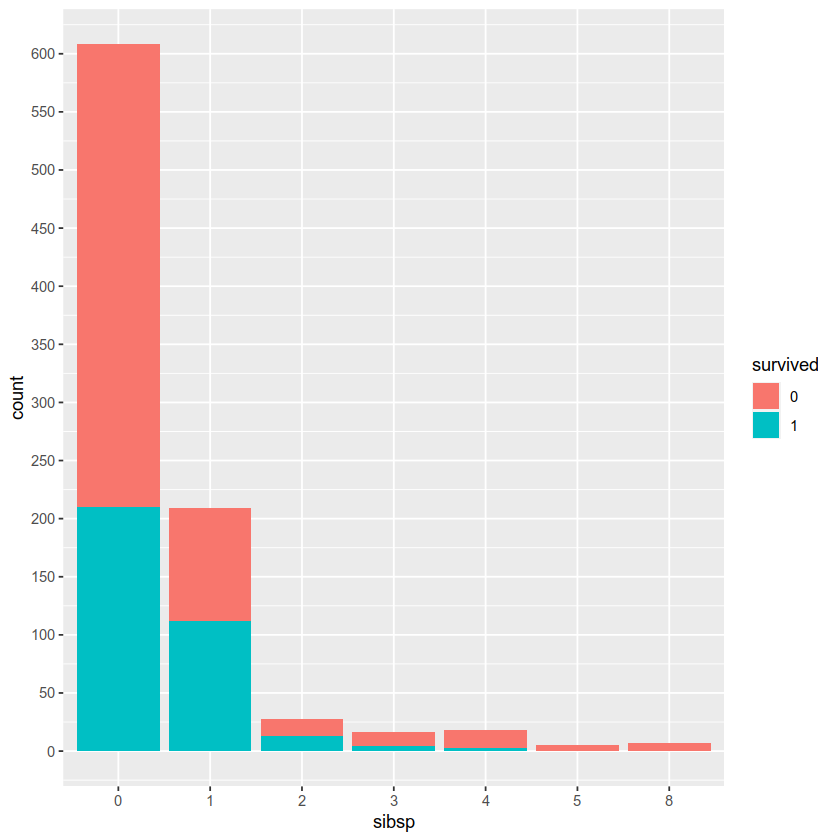

In [130]:
ggplot(data = dataset, aes(x = sibsp, fill = survived)) +
geom_bar() +
scale_y_continuous(breaks = round(seq(0, 620, by = 50), 1))

Warning message:
“position_stack requires non-overlapping x intervals”


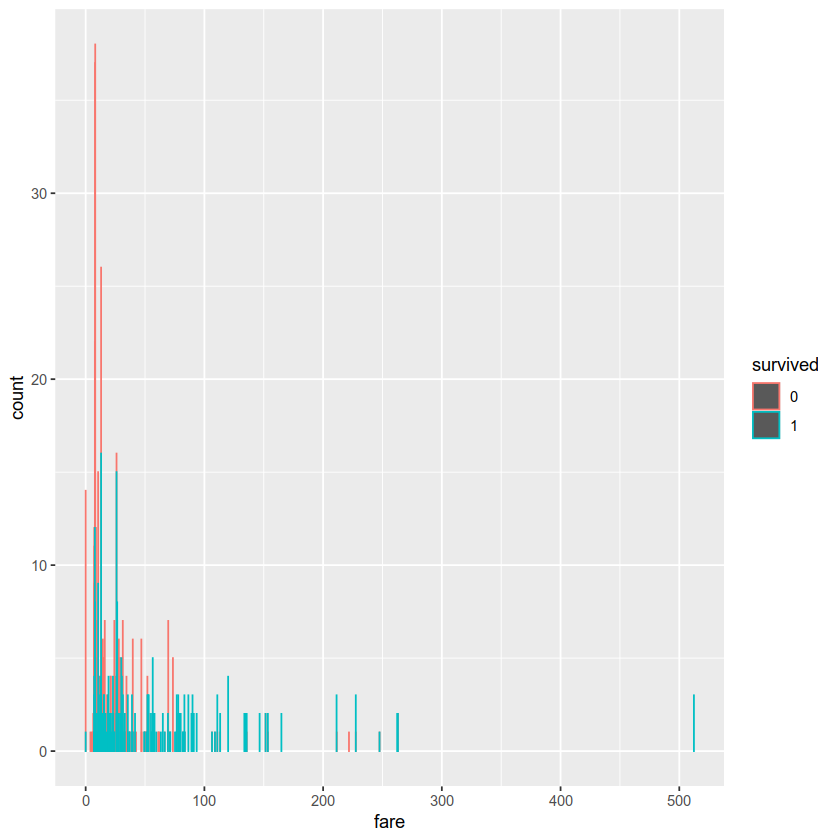

In [140]:
ggplot(data = dataset, aes(x = fare, color = survived)) +
geom_bar()

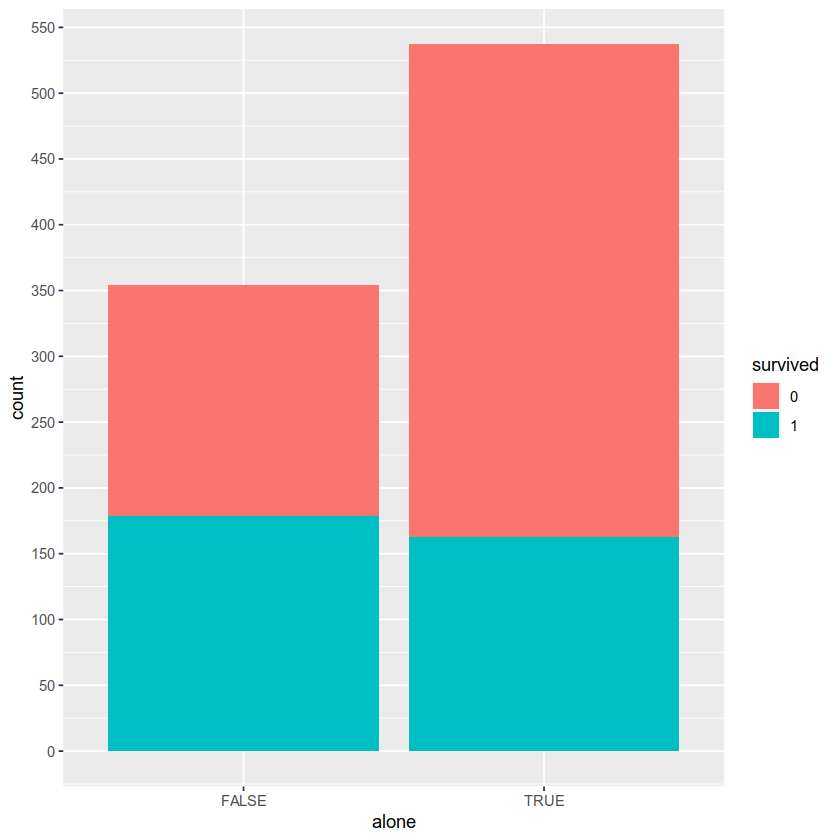

In [142]:
ggplot(data = dataset, aes(x = alone, fill = survived)) +
geom_bar() +
scale_y_continuous(breaks = round(seq(0, 550, by = 50), 1))